## Task 6: Prediction using Decision Tree Algorithm

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelBinarizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics

In [3]:
!pip install seaborn

## Import the data into a dataframe

In [2]:
iris_df = pd.read_csv('Iris.csv')

In [3]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Data Exploration and Visualization

In [4]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
Species = iris_df['Species'].unique()

In [6]:
Species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
sentosa = iris_df.loc[iris_df['Species']=='Iris-setosa'].describe()

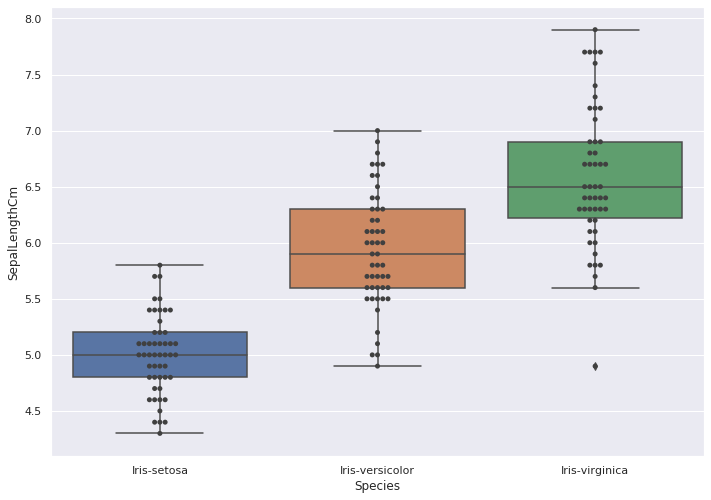

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x='Species', y='SepalLengthCm', data=iris_df)
ax = sns.swarmplot(x='Species', y="SepalLengthCm", data=iris_df, color=".25")


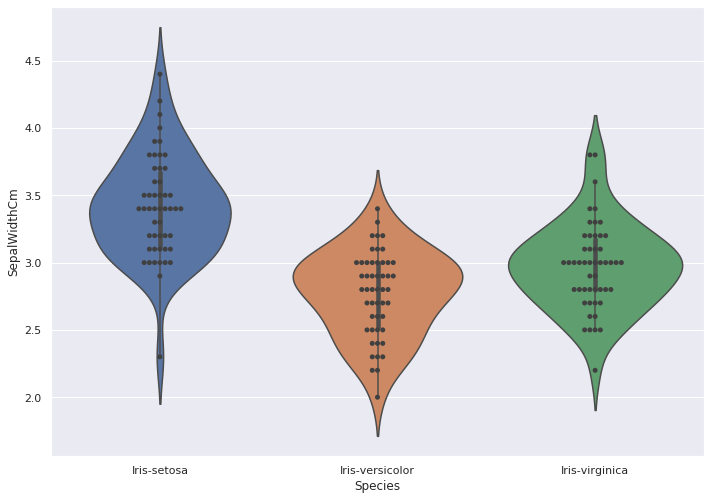

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.violinplot(x='Species', y='SepalWidthCm', data=iris_df)
ax = sns.swarmplot(x='Species', y="SepalWidthCm", data=iris_df, color=".25")


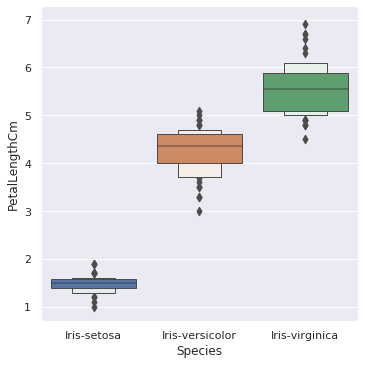

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.catplot(x='Species', y='PetalLengthCm', kind="boxen",data=iris_df)

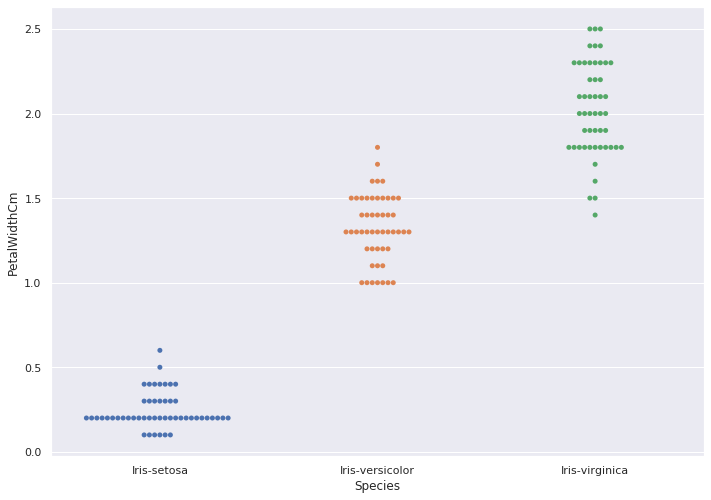

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.swarmplot(x='Species', y='PetalWidthCm',data=iris_df)

In [12]:
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

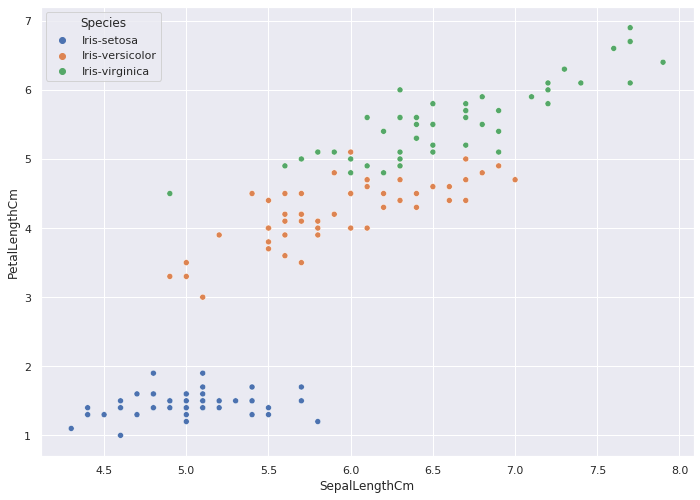

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=iris_df, x="SepalLengthCm", y="PetalLengthCm", hue="Species")

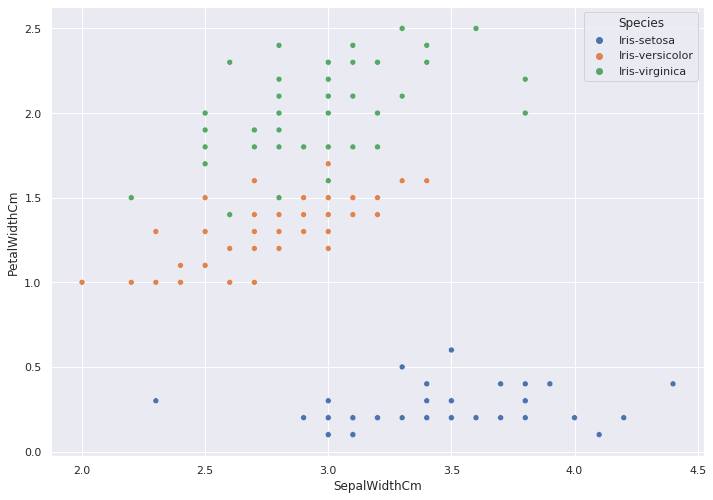

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=iris_df, x="SepalWidthCm", y="PetalWidthCm", hue="Species")

In [15]:
X = iris_df.iloc[:,1:-1]
y = iris_df.iloc[:,-1:]

In [16]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
y 

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


## Data Encoding and splitting

In [18]:
lb = LabelBinarizer()

In [19]:
y_n = lb.fit_transform(y)

In [20]:
type(y_n)

numpy.ndarray

In [21]:
X = np.array(X)

In [22]:
X.shape

(150, 4)

In [23]:
y.shape

(150, 1)

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y_n, test_size=0.2, shuffle=True,random_state=123)

In [25]:
X_train.shape

(120, 4)

In [26]:
X_train.reshape(-1,4)

array([[7.4, 2.8, 6.1, 1.9],
       [6. , 2.2, 5. , 1.5],
       [4.7, 3.2, 1.6, 0.2],
       [5.1, 3.5, 1.4, 0.2],
       [6. , 2.2, 4. , 1. ],
       [5. , 2.3, 3.3, 1. ],
       [7.9, 3.8, 6.4, 2. ],
       [5.4, 3.9, 1.7, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.8, 2.7, 3.9, 1.2],
       [5. , 2. , 3.5, 1. ],
       [5. , 3.2, 1.2, 0.2],
       [6.8, 3.2, 5.9, 2.3],
       [6.7, 3. , 5.2, 2.3],
       [5.8, 2.7, 5.1, 1.9],
       [5.8, 2.8, 5.1, 2.4],
       [6.3, 3.4, 5.6, 2.4],
       [5.5, 2.3, 4. , 1.3],
       [5.1, 3.8, 1.5, 0.3],
       [4.4, 3. , 1.3, 0.2],
       [6.5, 3.2, 5.1, 2. ],
       [5.1, 3.3, 1.7, 0.5],
       [4.9, 3.1, 1.5, 0.1],
       [6.7, 3.1, 4.7, 1.5],
       [6.1, 3. , 4.6, 1.4],
       [5.5, 2.5, 4. , 1.3],
       [5.7, 2.6, 3.5, 1. ],
       [5.8, 2.7, 5.1, 1.9],
       [6.7, 3.1, 4.4, 1.4],
       [6.4, 3.2, 5.3, 2.3],
       [4.5, 2.3, 1.3, 0.3],
       [6.7, 3.3, 5.7, 2.1],
       [5.7, 3. , 4.2, 1.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.8, 3

## Grid Search CV for finding the optimal parameters

In [27]:
params = {'criterion':['gini', 'entropy'],'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],
         'max_depth': list(range(2,10))}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 4704 candidates, totalling 14112 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14112 out of 14112 | elapsed:   48.7s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [28]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5, random_state=42)

In [29]:
grid_search_cv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_leaf_nodes': 5,
 'min_samples_split': 2}

In [30]:
grid_search_cv.best_score_

0.9333333333333332

In [31]:
grid_search_cv.best_estimator_.score(X_test,y_test)

0.9333333333333333

## Applying Decision Tree

In [32]:
tree_final = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5, random_state=42,min_samples_split=2)

In [33]:
tree_final.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5, random_state=42)

In [34]:
y_pred = tree_final.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## Plotting the Decision Tree

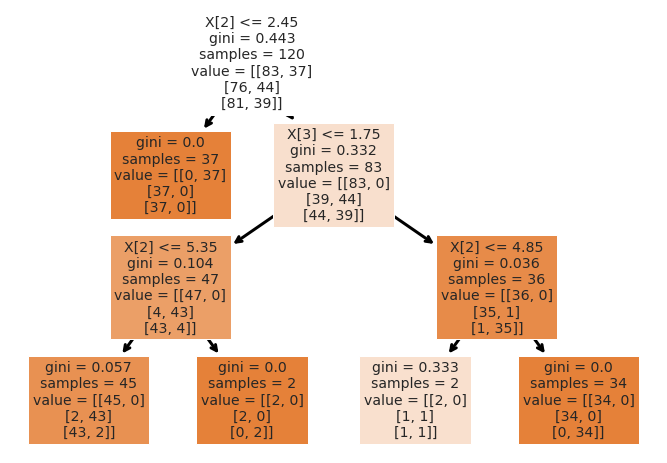

In [40]:
tree = plot_tree(tree_final, filled=True)
for o in tree:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)